### Importing libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Function for reading image
def read_img(image_path):
  image=cv2.imread(image_path)
  return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


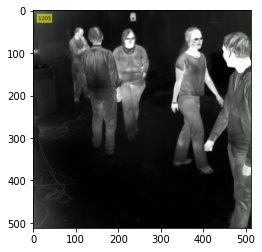

In [ ]:
image=read_img("original.png")
plt.imshow(image)

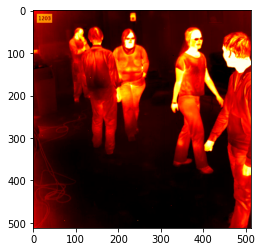

In [ ]:
# Original image into Hot colormap
heatmap_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
heatmap=cv2.applyColorMap(heatmap_gray,cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap,cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)
# plt.imsave("Output","2_hot_colormap.png"),heatmap,cmap="gray"

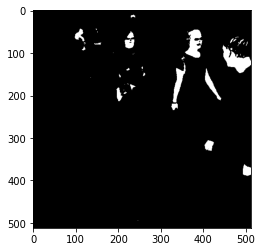

In [ ]:
# Doing binary tgreshold
heatmap_gray = cv2.cvtColor(heatmap,cv2.COLOR_RGB2GRAY)
ret,binary_thresh = cv2.threshold(heatmap_gray,200,255,cv2.THRESH_BINARY)
plt.imshow(binary_thresh,cmap="gray")

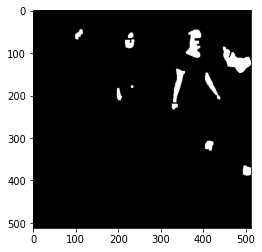

In [ ]:
# performing EROSION followed by DILATION
kernal = np.ones((5,5),np.uint8)
image_erosion = cv2.erode(binary_thresh,kernal,iterations=1)
image_dilation = cv2.dilate(image_erosion,kernal,iterations=1)
plt.imshow(image_dilation,cmap="gray")

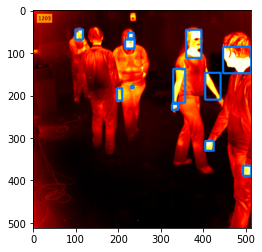

In [ ]:
# find contour and draw rectangles
contours,_ = cv2.findContours(image_dilation,1,2)
image_rect = np.copy(heatmap)

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  image_rect = cv2.rectangle(image_rect,(x,y),(x+w,y+h),(0,120,255),3)
plt.imshow(image_rect)